In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error,r2_score,d2_pinball_score

from scipy.stats import pearsonr

In [2]:
data = pd.read_csv("winequality-white.csv",  delimiter=';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.shape

(4898, 12)

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
gr = GaussianProcessRegressor()
dt = DecisionTreeRegressor()
vr=VotingRegressor(estimators=[('gr', gr), ('dt', dt)])

modelos = [('GR',gr),
           ('Decision Tree',dt),
           ('VotingRegressor',vr)]

In [7]:
X = data.drop(['quality'], axis=1)
y = data['quality']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [9]:
dt.fit(X_train, y_train)
gr.fit(X_train, y_train)
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('gr', GaussianProcessRegressor()),
                            ('dt', DecisionTreeRegressor())])

In [10]:
y_pred = vr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_gp = gr.predict(X_test)

In [11]:

#D2
d2 = d2_pinball_score(y_test, y_pred)
d2_dt = d2_pinball_score(y_test, y_pred_dt)
d2_gp = d2_pinball_score(y_test, y_pred_gp)

#R
r, _ = pearsonr(y_test, y_pred)
r_dt,_= pearsonr(y_test, y_pred_dt)
r_gp,_= pearsonr(y_test, y_pred_gp)

#R2
r2=r**2
r2_dt = r_dt**2
r2_gp = r_gp**2

#SSE
sse = ((y_test - y_pred) ** 2).sum()
sse_dt = ((y_test - y_pred_dt) ** 2).sum()
sse_gp = ((y_test - y_pred_gp) ** 2).sum()

#MAE
mae = mean_absolute_error(y_test, y_pred)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_gp = mean_absolute_error(y_test, y_pred_gp)


#MSE
mse = mean_squared_error(y_test, y_pred)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_gp = mean_squared_error(y_test, y_pred_gp)

#RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
rmse_gp = mean_squared_error(y_test, y_pred_gp, squared=False)




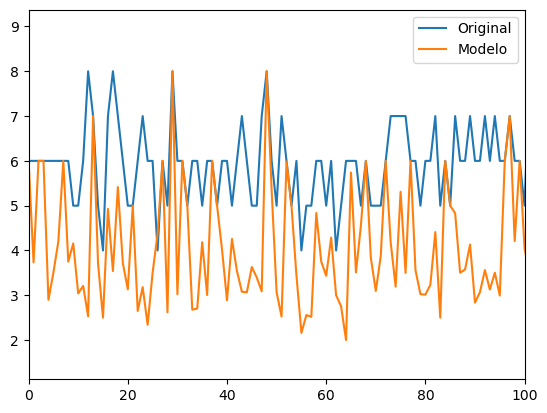

In [12]:
plt.plot(y_test.values, label='Original')
plt.plot(y_pred, label='Modelo')
plt.xlim([0,100])
plt.legend()
plt.show()

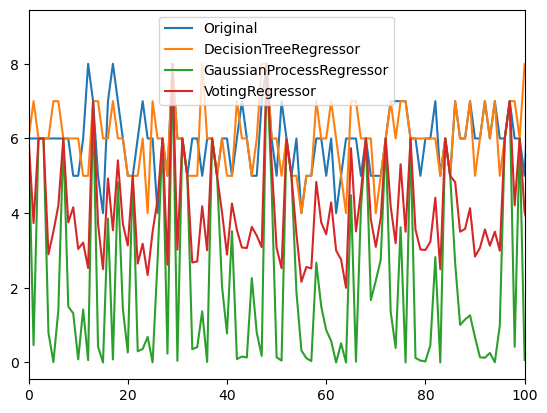

In [13]:
plt.plot(y_test.values, label='Original')
plt.plot(y_pred_dt, label='DecisionTreeRegressor')
plt.plot(y_pred_gp, label='GaussianProcessRegressor')
plt.plot(y_pred, label='VotingRegressor')
plt.xlim([0,100])
plt.legend()
plt.show()

In [14]:
print("VotingRegressor")
print("D2:", d2)
print("R:", r)
print("R2:", r2)
print("SSE:", sse)
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

print("\nDecisionTreeRegressor")
print("D2:", d2_dt)
print("R:", r_dt)
print("R2:", r2_dt)
print("SSE:", sse_dt)
print("MSE:", mse_dt)
print("MAE:", mae_dt)
print("RMSE:", rmse_dt)

print("\nGaussianProcessRegressor")
print("D2:", d2_gp)
print("R:", r_gp)
print("R2:", r2_gp)
print("SSE:", sse_gp)
print("MSE:", mse_gp)
print("MAE:", mae_gp)
print("RMSE:", rmse_gp)

VotingRegressor
D2: -1.8698960078565712
R: 0.3370487456003633
R2: 0.11360185691077841
SSE: 9668.374598932998
MSE: 4.932844183129081
MAE: 1.78050691099673
RMSE: 2.2210007165980565

DecisionTreeRegressor
D2: 0.1529605263157895
R: 0.5255527356787923
R2: 0.27620567797946255
SSE: 1492.0
MSE: 0.7612244897959184
MAE: 0.5255102040816326
RMSE: 0.8724817991201412

GaussianProcessRegressor
D2: -4.756228998983493
R: 0.1823721826630828
R2: 0.03325961300929684
SSE: 36447.454539374216
MSE: 18.595640071109294
MAE: 3.5712114605938408
RMSE: 4.312266233792771


In [15]:
d2=0
d2_dt=0
d2_gp=0

r=0
r_dt=0
r_gp=0

r2=0
r2_dt=0
r2_gp=0

sse=0
sse_dt=0
sse_gp=0

mae=0
mae_dt=0
mae_gp=0

mse=0
mse_dt=0
mse_gp=0


rmse=0
rmse_dt=0
rmse_gp=0

X_train, X_test, y_train, y_test=0,0,0,0

y_pred = 0
y_pred_dt = 0
y_pred_gp = 0


In [16]:
d2_scores = []
d2_scores_dt = []
d2_scores_gp = []

r_scores = []
r_scores_dt = []
r_scores_gp = []

r2_scores = []
r2_scores_dt = []
r2_scores_gp = []

sse_scores = []
sse_scores_dt = []
sse_scores_gp = []

mae_scores = []
mae_scores_dt = []
mae_scores_gp = []

mse_scores = []
mse_scores_dt = []
mse_scores_gp = []

rmse_scores = []
rmse_scores_dt = []
rmse_scores_gp = []

In [17]:
for i in range(30):
    # Realizar random subsampling
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
    
    # Entrenar el modelo en los datos de entrenamiento
    dt.fit(X_train, y_train)
    gr.fit(X_train, y_train)
    vr.fit(X_train, y_train)
    
    # Realizar las predicciones en los datos de prueba
    y_pred = vr.predict(X_test)
    y_pred_dt = dt.predict(X_test)
    y_pred_gp = gr.predict(X_test)
    
    # Calcular el coeficiente de determinación R2 y guardarlo en una lista
   
    
    #D2
    d2 = d2_pinball_score(y_test, y_pred)
    d2_dt = d2_pinball_score(y_test, y_pred_dt)
    d2_gp = d2_pinball_score(y_test, y_pred_gp)
    
    d2_scores.append(d2)
    d2_scores_dt.append(d2_dt)
    d2_scores_gp.append(d2_gp)

    #R
    r, _ = pearsonr(y_test, y_pred)
    r_dt,_= pearsonr(y_test, y_pred_dt)
    r_gp,_= pearsonr(y_test, y_pred_gp)
    
    r_scores.append(r)
    r_scores_dt.append(r_dt)
    r_scores_gp.append(r_gp)

    #R2
    r2=r**2
    r2_dt = r_dt**2
    r2_gp = r_gp**2
    
    r2_scores.append(r2)
    r2_scores_dt.append(r2_dt)
    r2_scores_gp.append(r2_gp)

    #SSE
    sse = ((y_test - y_pred) ** 2).sum()
    sse_dt = ((y_test - y_pred_dt) ** 2).sum()
    sse_gp = ((y_test - y_pred_gp) ** 2).sum()
    
    sse_scores.append(sse)
    sse_scores_dt.append(sse_dt)
    sse_scores_gp.append(sse_gp)

    #MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_dt = mean_absolute_error(y_test, y_pred_dt)
    mae_gp = mean_absolute_error(y_test, y_pred_gp)
    
    mae_scores.append(mae)
    mae_scores_dt.append(mae_dt)
    mae_scores_gp.append(mae_gp)


    #MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_dt = mean_squared_error(y_test, y_pred_dt)
    mse_gp = mean_squared_error(y_test, y_pred_gp)
    
    mse_scores.append(mse)
    mse_scores_dt.append(mse_dt)
    mse_scores_gp.append(mse_gp)

    #RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
    rmse_gp = mean_squared_error(y_test, y_pred_gp, squared=False)
    
    rmse_scores.append(rmse)
    rmse_scores_dt.append(rmse_dt)
    rmse_scores_gp.append(rmse_gp)


In [24]:
mean_d2 = sum(d2_scores)/len(d2_scores)
mean_d2_dt = sum(d2_scores_dt)/len(d2_scores_dt)
mean_d2_gp = sum(d2_scores_gp)/len(d2_scores_gp)

mean_r = sum(r_scores)/len(r_scores)
mean_r_dt = sum(r_scores_dt)/len(r_scores_dt)
mean_r_gp = sum(r_scores_gp)/len(r_scores_gp)

mean_r2 = sum(r2_scores)/len(r2_scores)
mean_r2_dt = sum(r2_scores_dt)/len(r2_scores_dt)
mean_r2_gp = sum(r2_scores_gp)/len(r2_scores_gp)

mean_sse = sum(sse_scores)/len(sse_scores)
mean_sse_dt = sum(sse_scores_dt)/len(sse_scores_dt)
mean_sse_gp = sum(sse_scores_gp)/len(sse_scores_gp)

mean_mae = sum(mae_scores)/len(mae_scores)
mean_mae_dt = sum(mae_scores_dt)/len(mae_scores_dt)
mean_mae_gp = sum(mae_scores_gp)/len(mae_scores_gp)

mean_mse = sum(mse_scores)/len(mse_scores)
mean_mse_dt = sum(mse_scores_dt)/len(mse_scores_dt)
mean_mse_gp = sum(mse_scores_gp)/len(mse_scores_gp)

mean_rmse = sum(rmse_scores)/len(rmse_scores)
mean_rmse_dt = sum(rmse_scores_dt)/len(rmse_scores_dt)
mean_rmse_gp = sum(rmse_scores_gp)/len(rmse_scores_gp)

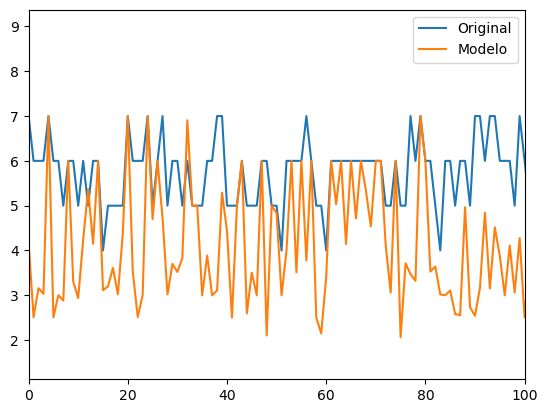

In [25]:
plt.plot(y_test.values, label='Original')
plt.plot(y_pred, label='Modelo')
plt.xlim([0,100])
plt.legend()
plt.show()

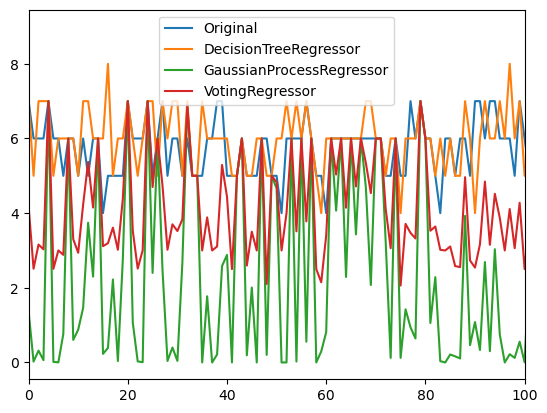

In [26]:
plt.plot(y_test.values, label='Original')
plt.plot(y_pred_dt, label='DecisionTreeRegressor')
plt.plot(y_pred_gp, label='GaussianProcessRegressor')
plt.plot(y_pred, label='VotingRegressor')
plt.xlim([0,100])
plt.legend()
plt.show()

In [27]:
print("VotingRegressor")
print("D2:", mean_d2)
print("R:", mean_r)
print("R2:", mean_r2)
print("SSE:", mean_sse)
print("MSE:", mean_mse)
print("MAE:", mean_mae)
print("RMSE:", mean_rmse)

print("\nDecisionTreeRegressor")
print("D2:", mean_d2_dt)
print("R:", mean_r_dt)
print("R2:", mean_r2_dt)
print("SSE:", mean_sse_dt)
print("MSE:", mean_mse_dt)
print("MAE:", mean_mae_dt)
print("RMSE:", mean_rmse_dt)

print("\nGaussianProcessRegressor")
print("D2:", mean_d2_gp)
print("R:", mean_r_gp)
print("R2:", mean_r2_gp)
print("SSE:", mean_sse_gp)
print("MSE:", mean_mse_gp)
print("MAE:", mean_mae_gp)
print("RMSE:", mean_rmse_gp)

VotingRegressor
D2: -1.603835056765182
R: 0.3546689490301027
R2: 0.126438247555311
SSE: 5512.615276629895
MSE: 4.500094103371343
MAE: 1.641999038527288
RMSE: 2.120988525968474

DecisionTreeRegressor
D2: 0.20062918690412376
R: 0.5412928249964573
R2: 0.2934883011993578
SSE: 896.2
MSE: 0.731591836734694
MAE: 0.5041632653061225
RMSE: 0.8549522162456455

GaussianProcessRegressor
D2: -4.209605613286005
R: 0.20203727005219912
R2: 0.041701333836243595
SSE: 20665.64494632252
MSE: 16.869914241895934
MAE: 3.2852755634945208
RMSE: 4.10698304112646


In [32]:
d2=0
d2_dt=0
d2_gp=0

r=0
r_dt=0
r_gp=0

r2=0
r2_dt=0
r2_gp=0

sse=0
sse_dt=0
sse_gp=0

mae=0
mae_dt=0
mae_gp=0

mse=0
mse_dt=0
mse_gp=0


rmse=0
rmse_dt=0
rmse_gp=0

X_train, X_test, y_train, y_test=0,0,0,0

y_pred = 0
y_pred_dt = 0
y_pred_gp = 0

mean_d2 = 0
mean_d2_dt = 0
mean_d2_gp = 0

mean_r = 0
mean_r_dt = 0
mean_r_gp = 0

mean_r2 = 0
mean_r2_dt = 0
mean_r2_gp = 0

mean_sse = 0
mean_sse_dt = 0
mean_sse_gp = 0

mean_mae = 0
mean_mae_dt = 0
mean_mae_gp = 0

mean_mse = 0
mean_mse_dt = 0
mean_mse_gp = 0

mean_rmse = 0
mean_rmse_dt = 0
mean_rmse_gp = 0

d2_scores.clear()
d2_scores_dt.clear()
d2_scores_gp.clear()

r_scores.clear()
r_scores_dt.clear()
r_scores_gp.clear()

r2_scores.clear()
r2_scores_dt.clear()
r2_scores_gp.clear()

sse_scores.clear()
sse_scores_dt.clear()
sse_scores_gp.clear()

mae_scores.clear()
mae_scores_dt.clear()
mae_scores_gp.clear()

mse_scores.clear()
mse_scores_dt.clear()
mse_scores_gp.clear()

rmse_scores.clear()
rmse_scores_dt.clear()
rmse_scores_gp.clear()

In [36]:
kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X):
    
    # Obtener los datos de entrenamiento y de prueba para este fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenar el modelo en los datos de entrenamiento
    dt.fit(X_train, y_train)
    gr.fit(X_train, y_train)
    vr.fit(X_train, y_train)
    
    # Realizar las predicciones en los datos de prueba
    y_pred = vr.predict(X_test)
    y_pred_dt = dt.predict(X_test)
    y_pred_gp = gr.predict(X_test)
     

     #D2
    d2 = d2_pinball_score(y_test, y_pred)
    d2_dt = d2_pinball_score(y_test, y_pred_dt)
    d2_gp = d2_pinball_score(y_test, y_pred_gp)
    
    d2_scores.append(d2)
    d2_scores_dt.append(d2_dt)
    d2_scores_gp.append(d2_gp)

    #R
    r, _ = pearsonr(y_test, y_pred)
    r_dt,_= pearsonr(y_test, y_pred_dt)
    r_gp,_= pearsonr(y_test, y_pred_gp)
    
    r_scores.append(r)
    r_scores_dt.append(r_dt)
    r_scores_gp.append(r_gp)

    #R2
    r2=r**2
    r2_dt = r_dt**2
    r2_gp = r_gp**2
    
    r2_scores.append(r2)
    r2_scores_dt.append(r2_dt)
    r2_scores_gp.append(r2_gp)

    #SSE
    sse = ((y_test - y_pred) ** 2).sum()
    sse_dt = ((y_test - y_pred_dt) ** 2).sum()
    sse_gp = ((y_test - y_pred_gp) ** 2).sum()
    
    sse_scores.append(sse)
    sse_scores_dt.append(sse_dt)
    sse_scores_gp.append(sse_gp)

    #MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_dt = mean_absolute_error(y_test, y_pred_dt)
    mae_gp = mean_absolute_error(y_test, y_pred_gp)
    
    mae_scores.append(mae)
    mae_scores_dt.append(mae_dt)
    mae_scores_gp.append(mae_gp)


    #MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_dt = mean_squared_error(y_test, y_pred_dt)
    mse_gp = mean_squared_error(y_test, y_pred_gp)
    
    mse_scores.append(mse)
    mse_scores_dt.append(mse_dt)
    mse_scores_gp.append(mse_gp)

    #RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
    rmse_gp = mean_squared_error(y_test, y_pred_gp, squared=False)
    
    rmse_scores.append(rmse)
    rmse_scores_dt.append(rmse_dt)
    rmse_scores_gp.append(rmse_gp)

In [38]:
mean_d2 = sum(d2_scores)/len(d2_scores)
mean_d2_dt = sum(d2_scores_dt)/len(d2_scores_dt)
mean_d2_gp = sum(d2_scores_gp)/len(d2_scores_gp)

mean_r = sum(r_scores)/len(r_scores)
mean_r_dt = sum(r_scores_dt)/len(r_scores_dt)
mean_r_gp = sum(r_scores_gp)/len(r_scores_gp)

mean_r2 = sum(r2_scores)/len(r2_scores)
mean_r2_dt = sum(r2_scores_dt)/len(r2_scores_dt)
mean_r2_gp = sum(r2_scores_gp)/len(r2_scores_gp)

mean_sse = sum(sse_scores)/len(sse_scores)
mean_sse_dt = sum(sse_scores_dt)/len(sse_scores_dt)
mean_sse_gp = sum(sse_scores_gp)/len(sse_scores_gp)

mean_mae = sum(mae_scores)/len(mae_scores)
mean_mae_dt = sum(mae_scores_dt)/len(mae_scores_dt)
mean_mae_gp = sum(mae_scores_gp)/len(mae_scores_gp)

mean_mse = sum(mse_scores)/len(mse_scores)
mean_mse_dt = sum(mse_scores_dt)/len(mse_scores_dt)
mean_mse_gp = sum(mse_scores_gp)/len(mse_scores_gp)

mean_rmse = sum(rmse_scores)/len(rmse_scores)
mean_rmse_dt = sum(rmse_scores_dt)/len(rmse_scores_dt)
mean_rmse_gp = sum(rmse_scores_gp)/len(rmse_scores_gp)


-1.5139329540232114

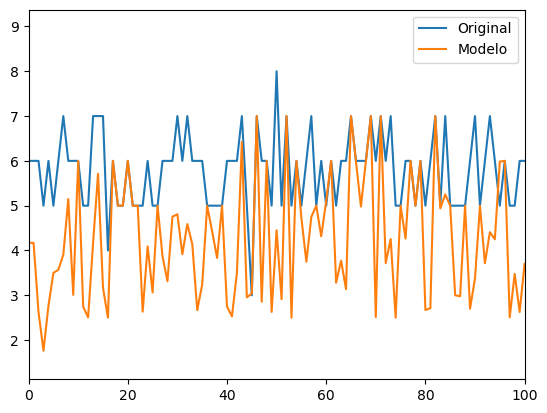

In [39]:
plt.plot(y_test.values, label='Original')
plt.plot(y_pred, label='Modelo')
plt.xlim([0,100])
plt.legend()
plt.show()

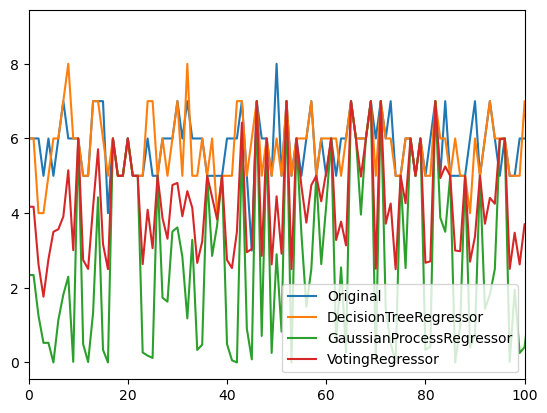

In [40]:
plt.plot(y_test.values, label='Original')
plt.plot(y_pred_dt, label='DecisionTreeRegressor')
plt.plot(y_pred_gp, label='GaussianProcessRegressor')
plt.plot(y_pred, label='VotingRegressor')
plt.xlim([0,100])
plt.legend()
plt.show()

In [41]:
print("VotingRegressor")
print("D2:", mean_d2)
print("R:", mean_r)
print("R2:", mean_r2)
print("SSE:", mean_sse)
print("MSE:", mean_mse)
print("MAE:", mean_mae)
print("RMSE:", mean_rmse)

print("\nDecisionTreeRegressor")
print("D2:", mean_d2_dt)
print("R:", mean_r_dt)
print("R2:", mean_r2_dt)
print("SSE:", mean_sse_dt)
print("MSE:", mean_mse_dt)
print("MAE:", mean_mae_dt)
print("RMSE:", mean_rmse_dt)

print("\nGaussianProcessRegressor")
print("D2:", mean_d2_gp)
print("R:", mean_r_gp)
print("R2:", mean_r2_gp)
print("SSE:", mean_sse_gp)
print("MSE:", mean_mse_gp)
print("MAE:", mean_mae_gp)
print("RMSE:", mean_rmse_gp)

VotingRegressor
D2: -1.5139329540232114
R: 0.3703386891301289
R2: 0.13826953244294943
SSE: 4215.564902647124
MSE: 4.303335920104823
MAE: 1.583486433704467
RMSE: 2.0739360911682407

DecisionTreeRegressor
D2: 0.2089741570341399
R: 0.547001927686056
R2: 0.30036335973743816
SSE: 703.6
MSE: 0.7182521731879676
MAE: 0.4983655750349169
RMSE: 0.8469273903867787

GaussianProcessRegressor
D2: -4.0214140461421355
R: 0.217535444223477
R2: 0.04888117943123389
SSE: 15759.985904343577
MSE: 16.08817581810244
MAE: 3.163042440406964
RMSE: 4.010393724283119
